# Internship Report Evaluation with a Fuzzy Inference System (Mamdani)

In [1]:
import matplotlib.pyplot as plt
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference
from ipywidgets import interact, widgets


# Variable Specification

In [2]:
variables = {
    "result" : FuzzyVariable(
        universe_range = (0,20),
        terms= {
            "Poor" : [(8,1),(9,0.5),(10,0)],
            "Average" : [(8,0),(9,0.5), (10,1),(16,1),(17,0.5),(18,0)],
             "Excellent": [(16,0),(17,0.5),(18,1)],
        },
    ),
    "presentation" : FuzzyVariable(
        universe_range = (0,20),
        terms= {
            "Poor" : [(8,1),(9,0.5),(10,0)],
            "Average" : [(8,0),(9,0.5), (10,1),(16,1),(17,0.5),(18,0)],
             "Excellent": [(16,0),(17,0.5),(18,1)],
        },
    ),
    "methods_used" : FuzzyVariable(
        universe_range = (0,20),
        terms= {
            "Poor" : [(8,1),(9,0.5),(10,0)],
            "Average" : [(8,0),(9,0.5), (10,1),(16,1),(17,0.5),(18,0)],
             "Excellent": [(16,0),(17,0.5),(18,1)],
        },
    ),
    #
    "global_eval" : FuzzyVariable(
        universe_range = (0,20),
        terms= {
            "Poor" : [(6,1),(7,0.5),(8,0)],
            "Bad" : [(6,0),(7,0.5), (8,1),(10,1),(11,0.5),(12,0)],
            "Average" : [(11,0),(11.5,0.25), (13,1),(14.5,0.25),(15,0)],
            "Good" : [(14,0),(14.5,0.25), (16,1),(18,1),(19,0)],
             "Excellent": [(17,0),(18.5,0.75),(19,1)],
        },
    ),

}

        

# Plotting Result Variable

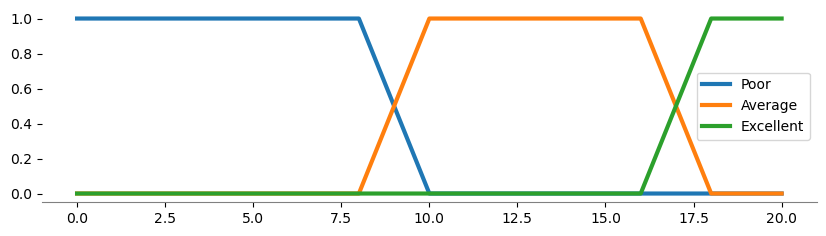

In [3]:
plt.figure(figsize=(10, 2.5))
variables["result"].plot()

# Plotting the Output variable : Global Evaluation

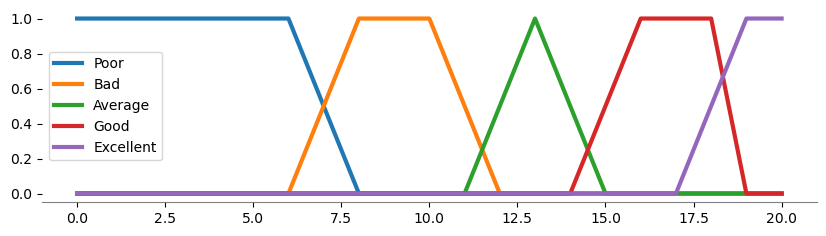

In [4]:
plt.figure(figsize=(10, 2.5))
variables["global_eval"].plot()

# Rule Specification

In [5]:
rules = [
    FuzzyRule(
        premise = [
            ("result", "Average"),
            ("AND","methods_used","Poor"),
        ],
        consequence= [ ("global_eval","Bad")],
    ),
    FuzzyRule(
        premise = [
            ("result", "Average"),
            ("AND","methods_used","Excellent"),
        ],
        consequence= [ ("global_eval","Good")],
    ),
    FuzzyRule(
        premise = [
            ("result", "Poor"),
            ("AND","methods_used","Average"),
        ],
        consequence= [ ("global_eval","Bad")],
    ),
    FuzzyRule(
        premise = [
            ("result", "Excellent"),
            ("AND","methods_used","Excellent"),
            ("AND","presentation","Excellent"),
        ],
        consequence= [ ("global_eval","Excellent")],
    ),
     FuzzyRule(
        premise = [
            ("result", "Poor"),
            ("OR","methods_used","Average"),
        ],
        consequence= [ ("global_eval","Average")],
    ),
     FuzzyRule(
        premise = [
            ("result", "Average"),
            ("OR","methods_used","Poor"),
        ],
        consequence= [("global_eval","Poor")],
    )
    
]

    
        

In [6]:
rules

[IF  result IS Average
     AND methods_used IS Poor
 THEN
     global_eval IS Bad
 CF = 1.00
 Threshold-CF = 0.00,
 IF  result IS Average
     AND methods_used IS Excellent
 THEN
     global_eval IS Good
 CF = 1.00
 Threshold-CF = 0.00,
 IF  result IS Poor
     AND methods_used IS Average
 THEN
     global_eval IS Bad
 CF = 1.00
 Threshold-CF = 0.00,
 IF  result IS Excellent
     AND methods_used IS Excellent
     AND presentation IS Excellent
 THEN
     global_eval IS Excellent
 CF = 1.00
 Threshold-CF = 0.00,
 IF  result IS Poor
     OR methods_used IS Average
 THEN
     global_eval IS Average
 CF = 1.00
 Threshold-CF = 0.00,
 IF  result IS Average
     OR methods_used IS Poor
 THEN
     global_eval IS Poor
 CF = 1.00
 Threshold-CF = 0.00]

# Mamdani Inference System

In [8]:
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

# Testing with :
        - Results : 12
        - Methods_Used : 6
        - Presentation : 19

In [9]:
model(
    variables=variables,
    rules=rules,
    result=12,
    presentation=19,
    methods_used=6,
)

({'global_eval': 5.444444444444443}, 1.0)

# Visualization of the Results

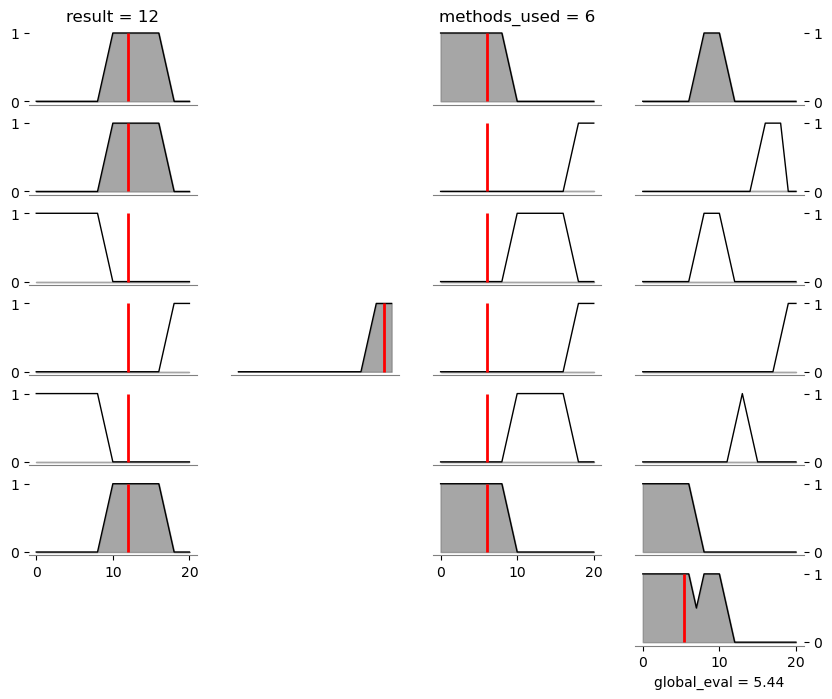

In [13]:
plt.figure(figsize=(10, 8))
model.plot(
    variables=variables,
    rules=rules,
    result=12,
    presentation=19,
    methods_used=6,
)

# Interactive Interface

In [15]:

def demo(result, presentation, methods_used):
    plt.figure(figsize=(10,6))
    model.plot(
        variables=variables,
        rules=rules,
        result=result,
        presentation=presentation,
        methods_used=methods_used,
    )

interact(
    demo,
    result=widgets.FloatSlider(min=0, max=20),
    presentation=widgets.FloatSlider(min=0, max=20),
    methods_used=widgets.FloatSlider(min=0, max=20),
)

interactive(children=(FloatSlider(value=0.0, description='result', max=20.0), FloatSlider(value=0.0, descripti…

<function __main__.demo(result, presentation, methods_used)>

# Fuzzy Rules with Certainty Factors

In [17]:
rules = [
    FuzzyRule(
        cf=1,
        premise = [
            ("result", "Average"),
            ("AND","methods_used","Poor"),
        ],
        consequence= [ ("global_eval","Bad")],
    ),
    FuzzyRule(
        cf=0.9,
        premise = [
            ("result", "Average"),
            ("AND","methods_used","Excellent"),
        ],
        consequence= [ ("global_eval","Good")],
    ),
    FuzzyRule(
        cf = 0.8,
        premise = [
            ("result", "Poor"),
            ("AND","methods_used","Average"),
        ],
        consequence= [ ("global_eval","Bad")],
    ),
    FuzzyRule(
        cf = 1,
        premise = [
            ("result", "Excellent"),
            ("AND","methods_used","Excellent"),
            ("AND","presentation","Excellent"),
        ],
        consequence= [ ("global_eval","Excellent")],
    ),
     FuzzyRule(
         cf= -0.4,
        premise = [
            ("result", "Poor"),
            ("OR","methods_used","Average"),
        ],
        consequence= [ ("global_eval","Average")],
    ),
     FuzzyRule(
         cf=-0.2,
        premise = [
            ("result", "Average"),
            ("OR","methods_used","Poor"),
        ],
        consequence= [("global_eval","Poor")],
    )
    
]

    
        

In [18]:
rules

[IF  result IS Average
     AND methods_used IS Poor
 THEN
     global_eval IS Bad
 CF = 1.00
 Threshold-CF = 0.00,
 IF  result IS Average
     AND methods_used IS Excellent
 THEN
     global_eval IS Good
 CF = 0.90
 Threshold-CF = 0.00,
 IF  result IS Poor
     AND methods_used IS Average
 THEN
     global_eval IS Bad
 CF = 0.80
 Threshold-CF = 0.00,
 IF  result IS Excellent
     AND methods_used IS Excellent
     AND presentation IS Excellent
 THEN
     global_eval IS Excellent
 CF = 1.00
 Threshold-CF = 0.00,
 IF  result IS Poor
     OR methods_used IS Average
 THEN
     global_eval IS Average
 CF = -0.40
 Threshold-CF = 0.00,
 IF  result IS Average
     OR methods_used IS Poor
 THEN
     global_eval IS Poor
 CF = -0.20
 Threshold-CF = 0.00]

# Results with certainty factors

In [19]:
model(
    variables=variables,
    rules=rules,
    result=12,
    presentation=19,
    methods_used=6,
)

({'global_eval': 9.000000000000002}, 1.0)

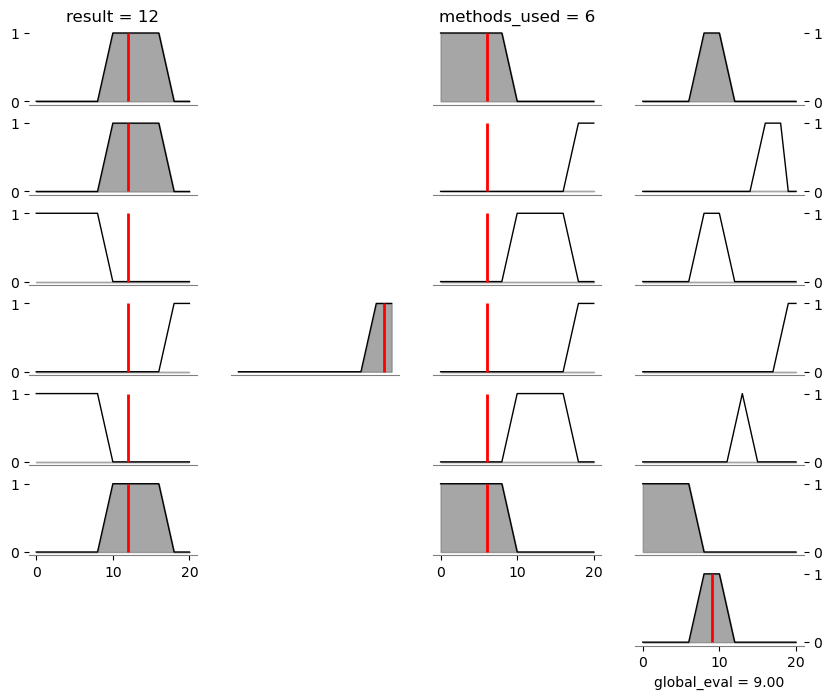

In [20]:
plt.figure(figsize=(10, 8))
model.plot(
    variables=variables,
    rules=rules,
    result=12,
    presentation=19,
    methods_used=6,
)